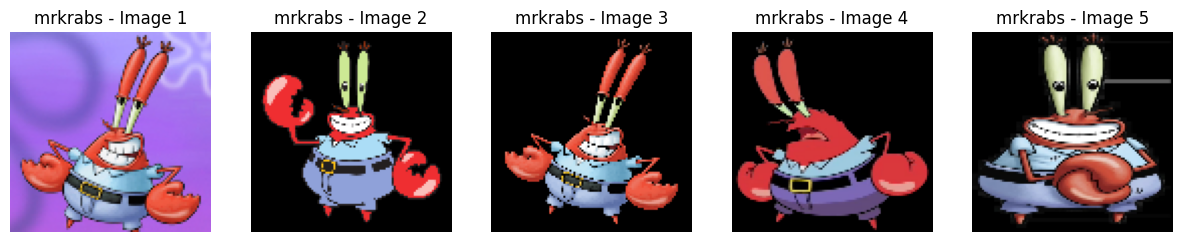

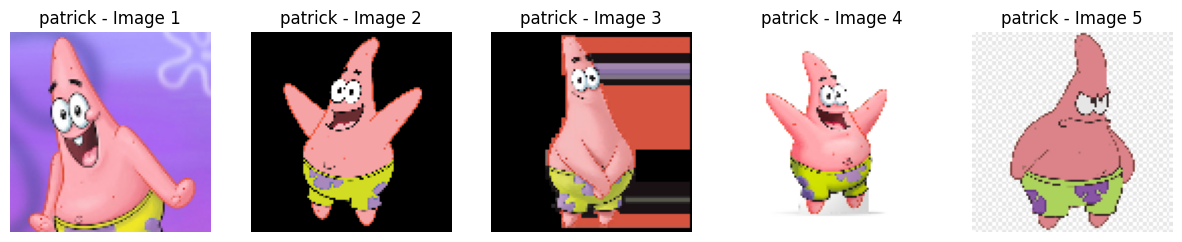

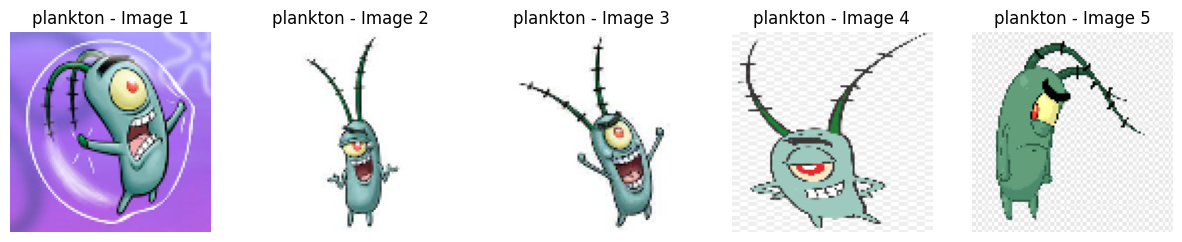

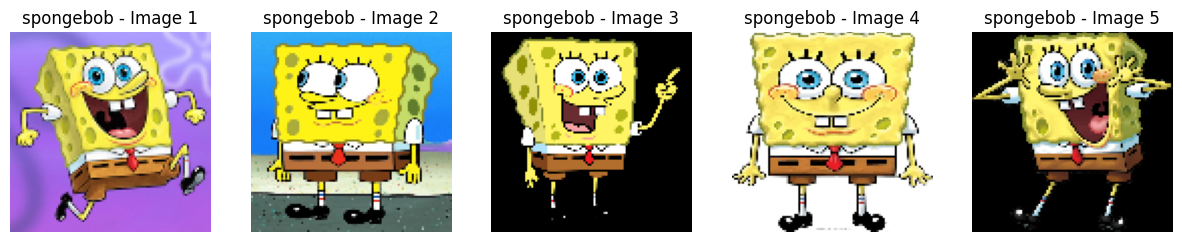

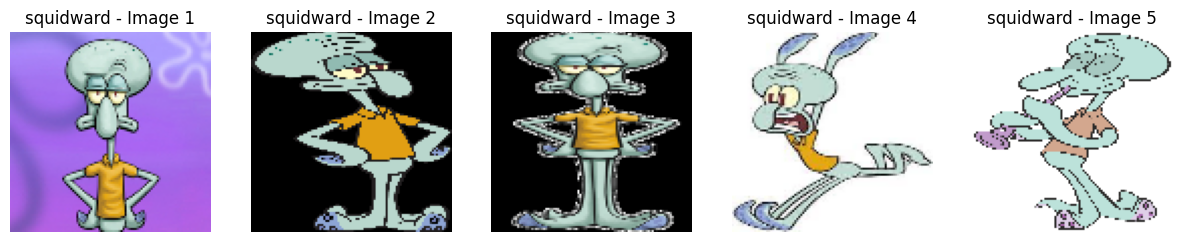

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import os 
from PIL import Image
import cv2 

data_dir = "C:\\Users\\malko\\Desktop\\Skola\\Labbar AI\\Labb1\\pictures\\"
categories = os.listdir(data_dir)
x, y = 100, 100

for category in categories:
    category_path = os.path.join(data_dir, category)
    category_images = []

    for filename in os.listdir(category_path):
        img_path = os.path.join(category_path, filename)
        img = cv2.imread(img_path)
        img = cv2.resize(img, (x, y))
        category_images.append(img)

    # Create a single row of subplots for each category
    num_images = len(category_images)
    fig, axes = plt.subplots(1, num_images, figsize=(15, 3))
    
    for i, img in enumerate(category_images):
        axes[i].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        axes[i].set_title(f"{category} - Image {i+1}")
        axes[i].axis('off')
    
    plt.show()



In [6]:
from keras.datasets import mnist

ModuleNotFoundError: No module named 'keras'

In [3]:
(Xtr, Ltr), (X_test, L_test)=mnist.load_data()

In [4]:
Xtr.shape

(60000, 28, 28)

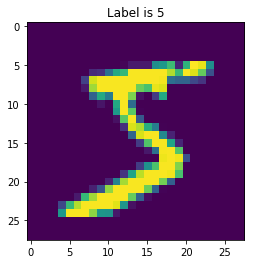

In [5]:
Image=Xtr[0,:,:]
Label=Ltr[0]


plt.title('Label is {Label}'.format(Label=Label))
plt.imshow(Image)

plt.show()
plt.close()


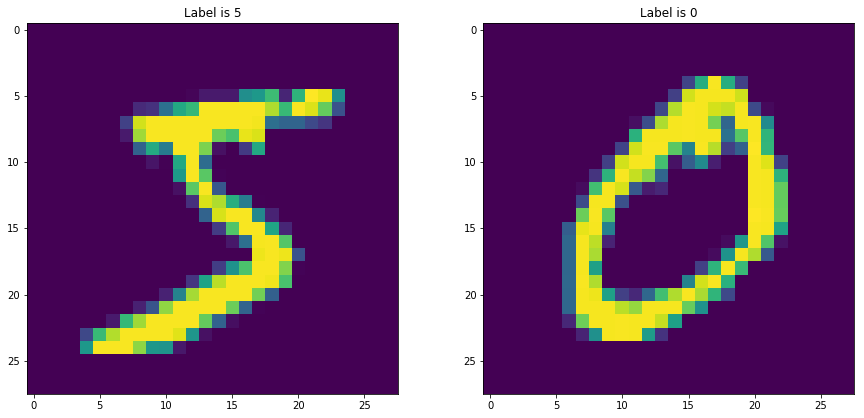

In [6]:
fig, ax=plt.subplots(nrows=1, ncols=2, figsize=(15,15))
ax0=plt.subplot(2,2,1)
ax1=plt.subplot(2,2,2)

Image=Xtr[0,:,:]
Label=Ltr[0]
Image1=Xtr[1,:,:]
Label1=Ltr[1]


ax0.set_title('Label is {Label}'.format(Label=Label))
ax0.imshow(Image)
ax1.set_title('Label is {Label}'.format(Label=Label1))
ax1.imshow(Image1)


plt.show()
plt.close()


In [7]:
28*28

784

In [14]:
#Traing phase
num_sample=500
Tr_set=Xtr[:num_sample,:,:]
Ltr_set=Ltr[:num_sample]

Tr_set=Tr_set.reshape(num_sample,Tr_set.shape[1]*Tr_set.shape[2])

#Tr_set=Tr_set.reshape(num_sample,Tr_set.shape[1]*Tr_set.shape[2]).astype()
Tr_set.shape

(500, 784)

In [12]:
def predict(X):
    num_test=X.shape[0]
    Lpred=np.zeros(num_test, dtype=Ltr_set.dtype)
    
    for i in range(num_test):
        distances=np.sum(np.abs(Tr_set-X[i,:]),axis=1)
        
        min_index= np.argmin(distances)
        Lpred[i]=Ltr_set[min_index]
    return Lpred

In [13]:
Test_images=X_test.reshape(X_test.shape[0],X_test.shape[1]* X_test.shape[2])
Labels_predicted=predict(Test_images)

print("Accuracy:", np.mean(Labels_predicted==L_test))



Accuracy: 0.811
